# Lab - classification

In [21]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale, OneHotEncoder
%matplotlib inline

from scipy.stats import iqr
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Round 1

* ### Reading data

In [2]:
df = pd.read_csv('DATA_Customer-Churn.csv')
churnData = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]

* ### Checking data types

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
 4   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


In [4]:
# transform 'total charges' to numeric
churnData = churnData.copy()
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')


* ### Replacing null values

In [5]:
# check for na
churnData.isnull().sum()

tenure             0
SeniorCitizen      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [6]:
# remove nas
churnData.dropna(inplace=True)
churnData.isnull().sum()


tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

* ### X, y split

In [7]:
X = churnData.drop('Churn', axis=1)
y = churnData[['Churn']].copy()

* ### Transforming the data

In [8]:
# num and cat columns
numericalX = X.drop('SeniorCitizen', axis=1)
categoricalX = X[['SeniorCitizen']].copy()

# transform target to binary
y = pd.get_dummies(y, drop_first=True)

numericalX_columns = numericalX.columns

* ### X, y train, test split

In [9]:
tt_ratio = 0.3
rand_seed = 40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio, random_state=rand_seed)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

* ### Scaler & Power transformer

In [10]:
# train data
X_train_num = X_train[numericalX_columns]
X_train_cat = X_train.drop(numericalX_columns, axis=1)

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)

pt = PowerTransformer()
pt.fit(X_train_num)
X_train_num = pt.transform(X_train_num)
X_train_num = pd.DataFrame(X_train_num, columns=numericalX_columns)

X_train_num.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train_cat, X_train_num], axis=1, copy=False)

In [11]:
# test data
X_test_num = X_test[numericalX_columns]
X_test_cat = X_test.drop(numericalX_columns, axis=1)

X_test_num = scaler.transform(X_test_num)
X_test_num = pt.transform(X_test_num)
X_test_num = pd.DataFrame(X_test_num, columns=numericalX_columns)

X_test_num.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test_cat, X_test_num], axis=1, copy=False)

* ### Logistic regression

In [12]:
log_model = LogisticRegression() 

log_model.fit(X_train, y_train.to_numpy().ravel())

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

In [13]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

performance_log

,Error_metric,Train,Test
0,Accuracy,0.792970,0.782464
1,Precision,0.661941,0.614078
2,Recall,0.461246,0.457505


Confusion matrix for the train set


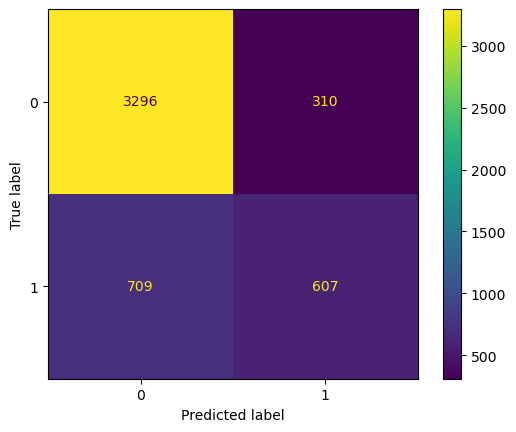

In [14]:
print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

Confusion matrix for the test set


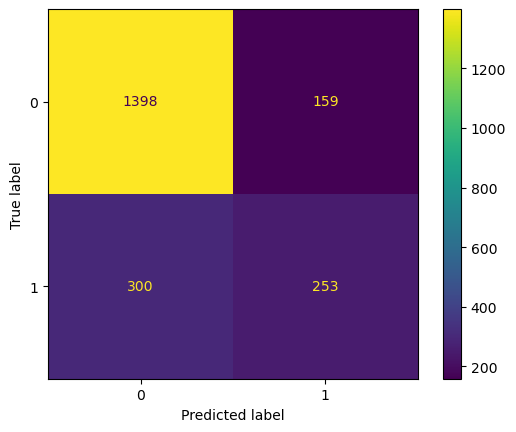

In [15]:
print("Confusion matrix for the test set")
#print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

* ### KNN

In [16]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform')

model.fit(X_train, y_train.to_numpy().ravel())
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


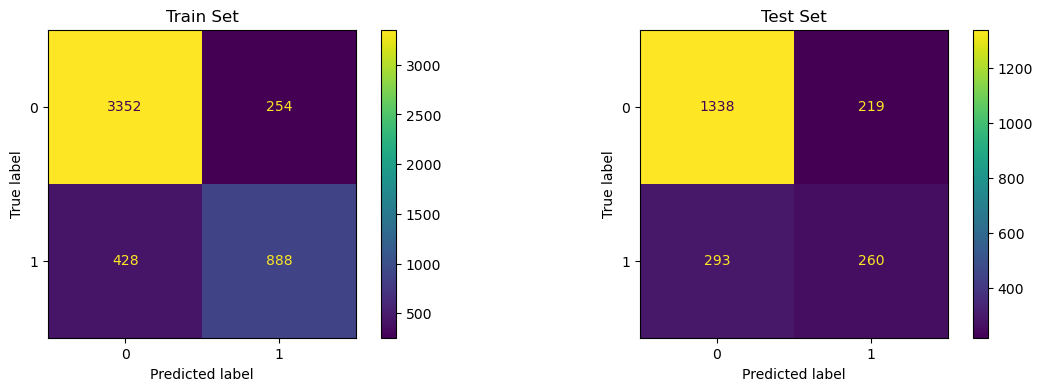

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [18]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

performance_log

,Error_metric,Train,Test
0,Accuracy,0.792970,0.782464
1,Precision,0.661941,0.614078
2,Recall,0.461246,0.457505


In [19]:
df_train = pd.DataFrame({'Real': y_train.to_numpy().ravel(), 'Predicted': y_pred_train})
df_test  = pd.DataFrame({'Real': y_test.to_numpy().ravel(),  'Predicted': y_pred_test})

df_test

,Real,Predicted
0,1,0
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
2105,0,0
2106,0,0
2107,0,0
2108,1,0


## Round 2

In [23]:
model = DecisionTreeClassifier(max_depth=3)

tt_ratio = 0.3
rand_seed = 40

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio, random_state=rand_seed)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

performance_df

,Error_metric,Train,Test
0,Accuracy,0.787891,0.769194
1,Precision,0.652466,0.586387
2,Recall,0.442249,0.405063


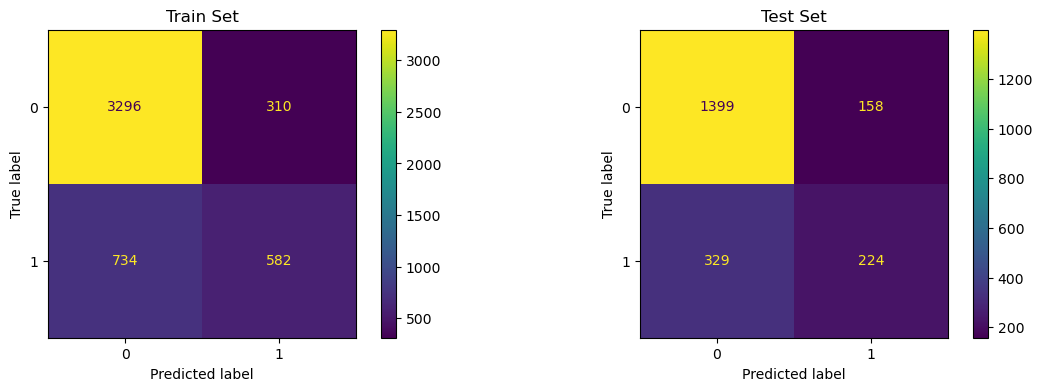

In [30]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")